In [13]:
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pl.read_parquet("data/journeys_flattened.parquet")
print(df.head())

shape: (5, 5)
┌─────────────┬─────────────┬────────────────┬─────────────────────────────────┬────────────────┐
│ customer_id ┆ account_id  ┆ events         ┆ timestamps                      ┆ journey_length │
│ ---         ┆ ---         ┆ ---            ┆ ---                             ┆ ---            │
│ i64         ┆ i64         ┆ list[i64]      ┆ list[datetime[μs, UTC]]         ┆ u32            │
╞═════════════╪═════════════╪════════════════╪═════════════════════════════════╪════════════════╡
│ -2147483541 ┆ 2059949086  ┆ [12, 5, … 1]   ┆ [2021-10-05 08:11:26 UTC, 2021… ┆ 29             │
│ -2147474305 ┆ 1098145658  ┆ [6, 19, … 21]  ┆ [2021-11-28 22:27:11 UTC, 2021… ┆ 32             │
│ -2147466542 ┆ -823743386  ┆ [12, 1, … 1]   ┆ [2021-12-25 22:00:57 UTC, 2021… ┆ 12             │
│ -2147464266 ┆ -640969143  ┆ [19, 19, … 12] ┆ [2022-08-11 09:16:09 UTC, 2022… ┆ 9              │
│ -2147459085 ┆ -1887501660 ┆ [19, 19, … 1]  ┆ [2021-02-09 15:56:00 UTC, 2021… ┆ 41             │
└─────

In [39]:
df_phone = df.filter(pl.col("events").list.contains(15))
#print(df_phone.head())
df_phone = df_phone.with_columns(
    order_shipped = pl.col("events").list.contains(28)
)
#print(df_phone.head())
stats_phone = df_phone.select([
    pl.col("order_shipped").sum().alias("count_shipped"),
    pl.len().alias("total_journeys"),
    (pl.col("order_shipped").mean() * 100).alias("percentage_shipped")
])

print(stats_phone)

shape: (1, 3)
┌───────────────┬────────────────┬────────────────────┐
│ count_shipped ┆ total_journeys ┆ percentage_shipped │
│ ---           ┆ ---            ┆ ---                │
│ u32           ┆ u32            ┆ f64                │
╞═══════════════╪════════════════╪════════════════════╡
│ 10222         ┆ 37298          ┆ 27.406295          │
└───────────────┴────────────────┴────────────────────┘


In [21]:
df_web = df.filter(pl.col("events").list.contains(12))
#print(df_web.head())
df_web = df_web.with_columns(
    order_shipped = pl.col("events").list.contains(28)
)
#print(df_web.head())
stats_web = df_web.select([
    pl.col("order_shipped").sum().alias("count_shipped"),
    pl.len().alias("total_journeys"),
    (pl.col("order_shipped").mean() * 100).alias("percentage_shipped")
])

print(stats_web)

shape: (1, 3)
┌───────────────┬────────────────┬────────────────────┐
│ count_shipped ┆ total_journeys ┆ percentage_shipped │
│ ---           ┆ ---            ┆ ---                │
│ u32           ┆ u32            ┆ f64                │
╞═══════════════╪════════════════╪════════════════════╡
│ 269012        ┆ 1390776        ┆ 19.342583          │
└───────────────┴────────────────┴────────────────────┘


In [43]:
df_phone = df_phone.with_columns(
    journey_duration = pl.col("timestamps").list.last() - pl.col("timestamps").list.first()
)

print(df_phone.head())

# so we can plot the floats instead of duration type
df_phone_plot = df_phone.with_columns(
    duration_days = pl.col("journey_duration").dt.total_days()
)

shape: (5, 7)
┌─────────────┬─────────────┬──────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ customer_id ┆ account_id  ┆ events       ┆ timestamps  ┆ journey_len ┆ order_shipp ┆ journey_dur │
│ ---         ┆ ---         ┆ ---          ┆ ---         ┆ gth         ┆ ed          ┆ ation       │
│ i64         ┆ i64         ┆ list[i64]    ┆ list[dateti ┆ ---         ┆ ---         ┆ ---         │
│             ┆             ┆              ┆ me[μs,      ┆ u32         ┆ bool        ┆ duration[μs │
│             ┆             ┆              ┆ UTC]]       ┆             ┆             ┆ ]           │
╞═════════════╪═════════════╪══════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ -2147450752 ┆ -689682723  ┆ [4, 11, … 5] ┆ [2022-05-17 ┆ 16          ┆ false       ┆ 18d 2h 51m  │
│             ┆             ┆              ┆ 19:11:25    ┆             ┆             ┆ 9s          │
│             ┆             ┆              ┆ UTC, 2022…  ┆             ┆     

In [23]:
df_web = df_web.with_columns(
    journey_duration = pl.col("timestamps").list.last() - pl.col("timestamps").list.first()
)

print(df_web.head())

# so we can plot the floats instead of duration type
df_web_plot = df_web.with_columns(
    duration_days = pl.col("journey_duration").dt.total_days()
)

shape: (5, 7)
┌─────────────┬─────────────┬──────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ customer_id ┆ account_id  ┆ events       ┆ timestamps  ┆ journey_len ┆ order_shipp ┆ journey_dur │
│ ---         ┆ ---         ┆ ---          ┆ ---         ┆ gth         ┆ ed          ┆ ation       │
│ i64         ┆ i64         ┆ list[i64]    ┆ list[dateti ┆ ---         ┆ ---         ┆ ---         │
│             ┆             ┆              ┆ me[μs,      ┆ u32         ┆ bool        ┆ duration[μs │
│             ┆             ┆              ┆ UTC]]       ┆             ┆             ┆ ]           │
╞═════════════╪═════════════╪══════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ -2147483541 ┆ 2059949086  ┆ [12, 5, … 1] ┆ [2021-10-05 ┆ 29          ┆ false       ┆ 238d 22h    │
│             ┆             ┆              ┆ 08:11:26    ┆             ┆             ┆ 58m 14s     │
│             ┆             ┆              ┆ UTC, 2021…  ┆             ┆     

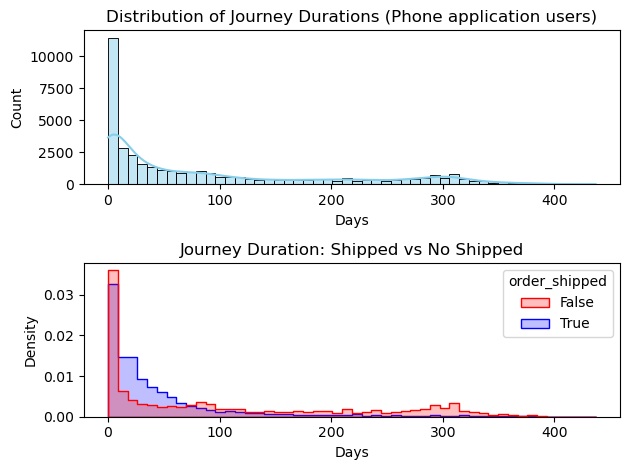

In [28]:
phone_data_for_plot = df_phone_plot.select(["duration_days", "order_shipped"]).to_pandas()

plt.subplot(2, 1, 1)
sns.histplot(data=phone_data_for_plot, x="duration_days", bins=50, color="skyblue", kde=True)
plt.title("Distribution of Journey Durations (Phone application users)")
plt.xlabel("Days")
plt.ylabel("Count")

plt.subplot(2, 1, 2)
sns.histplot(
    data=phone_data_for_plot, 
    x="duration_days", 
    hue="order_shipped",
    element="step",
    stat="density",
    common_norm=False,
    palette={True: "blue", False: "red"},
    bins=50
)
plt.title("Journey Duration: Shipped vs No Shipped")
plt.xlabel("Days")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

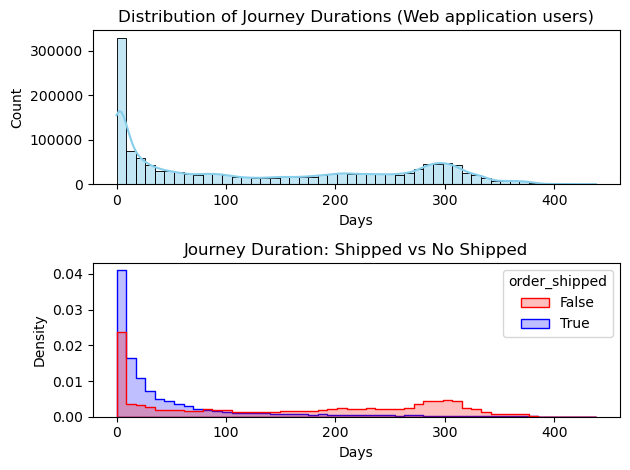

In [29]:
web_data_for_plot = df_web_plot.select(["duration_days", "order_shipped"]).to_pandas()

plt.subplot(2, 1, 1)
sns.histplot(data=web_data_for_plot, x="duration_days", bins=50, color="skyblue", kde=True)
plt.title("Distribution of Journey Durations (Web application users)")
plt.xlabel("Days")
plt.ylabel("Count")

plt.subplot(2, 1, 2)
sns.histplot(
    data=web_data_for_plot, 
    x="duration_days", 
    hue="order_shipped",
    element="step",
    stat="density",
    common_norm=False,
    palette={True: "blue", False: "red"},
    bins=50
)
plt.title("Journey Duration: Shipped vs No Shipped")
plt.xlabel("Days")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

In [30]:
phone_data_for_plot = df_phone_plot.select(["duration_days", "order_shipped"]).to_pandas()
phone_data_for_plot["duration_days"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00      0.0
0.25      4.0
0.50     38.0
0.75    147.0
1.00    437.0
Name: duration_days, dtype: float64

In [35]:
phone_data_for_plot.groupby("order_shipped")["duration_days"].quantile(
    [0, 0.25, 0.5, 0.75, 1]
)

order_shipped      
False          0.00      0.0
               0.25      0.0
               0.50     60.0
               0.75    200.0
               1.00    437.0
True           0.00      0.0
               0.25      7.0
               0.50     23.0
               0.75     55.0
               1.00    434.0
Name: duration_days, dtype: float64

In [32]:
web_data_for_plot = df_web_plot.select(["duration_days", "order_shipped"]).to_pandas()
web_data_for_plot["duration_days"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00      0.0
0.25     10.0
0.50    101.0
0.75    259.0
1.00    438.0
Name: duration_days, dtype: float64

In [36]:
web_data_for_plot.groupby("order_shipped")["duration_days"].quantile(
    [0, 0.25, 0.5, 0.75, 1]
)

order_shipped      
False          0.00      0.0
               0.25     20.0
               0.50    163.0
               0.75    278.0
               1.00    438.0
True           0.00      0.0
               0.25      5.0
               0.50     17.0
               0.75     55.0
               1.00    438.0
Name: duration_days, dtype: float64

In [49]:
df_phonetoweb = df_phone.filter(pl.col("events").list.contains(7))
print(df_phone.height)
print(df_phonetoweb.height)

37298
2029


In [48]:
df_webtophone = df_web.filter(pl.col("events").list.contains(18))
print(df_web.height)
print(df_webtophone.height)

1390776
34216
